In [17]:
# Import Required Libraries
import requests
import pandas as pd
import numpy as np
import zipfile
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import LocalOutlierFactor, NearestNeighbors
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans

# Fetch Data from Open Powerlifting API
Use the requests library to fetch data from the Open Powerlifting API.

# Import Required Libraries
Import the necessary libraries, including requests, pandas, and numpy.

In [2]:
# Fetch Data from Open Powerlifting API

# Define the URL for the Open Powerlifting dataset
url = "https://openpowerlifting.gitlab.io/opl-csv/files/openpowerlifting-latest.zip"
zip_filename = "openpowerlifting-latest.zip"
csv_filename = "openpowerlifting-latest.csv"

# Check if the zip file already exists
if not os.path.exists(zip_filename):
    # Send a GET request to download the zip file
    response = requests.get(url)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Save the zip file to the current directory
        with open(zip_filename, 'wb') as f:
            f.write(response.content)
    else:
        print(f"Failed to fetch data. Status code: {response.status_code}")

# Extract the CSV file from the zip archive if it doesn't already exist
if not os.path.exists(csv_filename):
    with zipfile.ZipFile(zip_filename, 'r') as z:
        # Find the CSV file in the zip archive
        csv_filename_in_zip = [f for f in z.namelist() if f.endswith('.csv')][0]
        # Extract the CSV file
        z.extract(csv_filename_in_zip, path='.')
        # Rename the extracted file to the desired CSV filename
        os.rename(csv_filename_in_zip, csv_filename)

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_filename)
# Display the first few rows of the DataFrame
df.head()

C:\Users\Patryk\AppData\Local\Temp\ipykernel_38828\2896851340.py:32: DtypeWarning: Columns (31,33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_filename)


,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName,Sanctioned
0,E.S. Denisenko,F,B,Raw,28.5,24-34,24-39,Open,67.3,NaN,...,NaN,NaN,GSF-Belarus,NaN,2019-06-22,Belarus,NaN,Luninets,Bison Power Cup,Yes
1,I.S. Lebetskaya,F,B,Raw,43.5,40-44,40-49,Open,73.2,NaN,...,NaN,NaN,GSF-Belarus,NaN,2019-06-22,Belarus,NaN,Luninets,Bison Power Cup,Yes
2,K. Yakimovich,F,B,Raw,26.5,24-34,24-39,Open,60.6,NaN,...,NaN,NaN,GSF-Belarus,NaN,2019-06-22,Belarus,NaN,Luninets,Bison Power Cup,Yes
3,A.G. Golneva,F,B,Raw,19.5,20-23,19-23,Juniors 17-21,50.3,NaN,...,NaN,NaN,GSF-Belarus,NaN,2019-06-22,Belarus,NaN,Luninets,Bison Power Cup,Yes
4,E.V. Marunevskaya,F,B,Raw,19.5,20-23,19-23,Juniors 17-21,63.7,NaN,...,NaN,NaN,GSF-Belarus,NaN,2019-06-22,Belarus,NaN,Luninets,Bison Power Cup,Yes


# Explore Basic Dataset Information
Use pandas functions to explore basic information about the dataset, such as shape, columns, and summary statistics.

In [3]:
# Explore Basic Dataset Information

# Display the shape of the DataFrame
df.shape

# Display the columns of the DataFrame
pd.set_option('display.max_columns', None)
df.columns

# Display summary statistics of the DataFrame
df.describe()

# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348602 entries, 0 to 3348601
Data columns (total 42 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Name              object 
 1   Sex               object 
 2   Event             object 
 3   Equipment         object 
 4   Age               float64
 5   AgeClass          object 
 6   BirthYearClass    object 
 7   Division          object 
 8   BodyweightKg      float64
 9   WeightClassKg     object 
 10  Squat1Kg          float64
 11  Squat2Kg          float64
 12  Squat3Kg          float64
 13  Squat4Kg          float64
 14  Best3SquatKg      float64
 15  Bench1Kg          float64
 16  Bench2Kg          float64
 17  Bench3Kg          float64
 18  Bench4Kg          float64
 19  Best3BenchKg      float64
 20  Deadlift1Kg       float64
 21  Deadlift2Kg       float64
 22  Deadlift3Kg       float64
 23  Deadlift4Kg       float64
 24  Best3DeadliftKg   float64
 25  TotalKg           float64
 26  Place         

# Data Cleaning and Preprocessing
Perform data cleaning and preprocessing steps, such as handling missing values and converting data types.

In [4]:
# Data Cleaning and Preprocessing

# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Drop columns with a high percentage of missing values (e.g., more than 50%)
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

# Fill missing values in numerical columns with the median value
numerical_columns = df.select_dtypes(include=[np.number]).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Fill missing values in categorical columns with the mode value
categorical_columns = df.select_dtypes(include=[object]).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Convert data types if necessary (e.g., convert 'date' column to datetime)
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Display the first few rows of the cleaned DataFrame
df.head()

# Display summary statistics of the cleaned DataFrame
# df.describe()

# Display information about the cleaned DataFrame
# df.info()

Missing values in each column:
 Name                      0
Sex                       0
Event                     0
Equipment                 0
Age                 1184860
AgeClass             901541
BirthYearClass      1112219
Division               1813
BodyweightKg          39921
WeightClassKg         45898
Squat1Kg            2307994
Squat2Kg            2318069
Squat3Kg            2344260
Squat4Kg            3339624
Best3SquatKg        1072017
Bench1Kg            1790417
Bench2Kg            1807355
Bench3Kg            1853390
Bench4Kg            3326554
Best3BenchKg         387029
Deadlift1Kg         2180397
Deadlift2Kg         2199934
Deadlift3Kg         2243776
Deadlift4Kg         3324046
Best3DeadliftKg      888371
TotalKg              222035
Place                     0
Dots                 247474
Wilks                247474
Glossbrenner         247474
Goodlift             514848
Tested               857161
Country             1430455
State               2636347
Federation      

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Place,Dots,Wilks,Glossbrenner,Goodlift,Tested,Country,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName,Sanctioned
0,E.S. Denisenko,F,B,Raw,28.5,24-34,24-39,Open,67.3,90,170.0,113.4,188.24,357.5,DQ,300.30,299.22,278.77,64.47,Yes,USA,GSF-Belarus,IPF,2019-06-22,Belarus,TX,Luninets,Bison Power Cup,Yes
1,I.S. Lebetskaya,F,B,Raw,43.5,40-44,40-49,Open,73.2,90,170.0,90.0,188.24,90.0,1,88.80,86.89,76.50,70.06,Yes,USA,GSF-Belarus,IPF,2019-06-22,Belarus,TX,Luninets,Bison Power Cup,Yes
2,K. Yakimovich,F,B,Raw,26.5,24-34,24-39,Open,60.6,90,170.0,45.0,188.24,45.0,2,49.57,49.79,43.98,38.42,Yes,USA,GSF-Belarus,IPF,2019-06-22,Belarus,TX,Luninets,Bison Power Cup,Yes
3,A.G. Golneva,F,B,Raw,19.5,20-23,19-23,Juniors 17-21,50.3,90,170.0,35.0,188.24,35.0,2,43.67,44.76,39.73,34.55,Yes,USA,GSF-Belarus,IPF,2019-06-22,Belarus,TX,Luninets,Bison Power Cup,Yes
4,E.V. Marunevskaya,F,B,Raw,19.5,20-23,19-23,Juniors 17-21,63.7,90,170.0,42.5,188.24,42.5,1,45.40,45.26,39.96,35.25,Yes,USA,GSF-Belarus,IPF,2019-06-22,Belarus,TX,Luninets,Bison Power Cup,Yes


Limit data by:  
    -Sex - male only  
    -Event - SBD only  
    -Equipment - Raw only  
    -Age class - Adults only  
    -WeightClassKg - make it mandatory  
    -Best3SquatKg, Best3BenchKg, Best3DeadliftKg - make it mandatory  
    -TotalKg - make it mandatory,  
    -Dots/Wilks/Glossbrenner/Goodlift - calculate if not registereed  
    -Tested - make it mandatory - interesting results between tested/non-tested  
    -Federation - IPF only  

In [5]:
sex_limitation = "M"
event_limitation = "SBD"
equipment_limitation = "Raw"
age_limitation = 18
tested_limitation = "Yes"
federation_limitation = "IPF"

# Filter the DataFrame based on the specified limitations
filtered_df = df.loc[(df['Sex'] == sex_limitation) & (df['Event'] == event_limitation) & (df['Equipment'] == equipment_limitation) & (df['Tested'] == tested_limitation) & (df['Federation'] == federation_limitation) & (df['Best3BenchKg'] >= 0) & (df['Best3DeadliftKg'] >= 0) & (df['Best3SquatKg'] >= 0)]
filtered_df.head()

# Display the shape of the DataFrame
filtered_df.shape

# Display the columns of the DataFrame
pd.set_option('display.max_columns', None)
filtered_df.columns

# Display summary statistics of the DataFrame
filtered_df.describe()

# Display information about the DataFrame
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5869 entries, 25458 to 3266930
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              5869 non-null   object 
 1   Sex               5869 non-null   object 
 2   Event             5869 non-null   object 
 3   Equipment         5869 non-null   object 
 4   Age               5869 non-null   float64
 5   AgeClass          5869 non-null   object 
 6   BirthYearClass    5869 non-null   object 
 7   Division          5869 non-null   object 
 8   BodyweightKg      5869 non-null   float64
 9   WeightClassKg     5869 non-null   object 
 10  Best3SquatKg      5869 non-null   float64
 11  Best3BenchKg      5869 non-null   float64
 12  Best3DeadliftKg   5869 non-null   float64
 13  TotalKg           5869 non-null   float64
 14  Place             5869 non-null   object 
 15  Dots              5869 non-null   float64
 16  Wilks             5869 non-null   float6

## Macierz korelacji

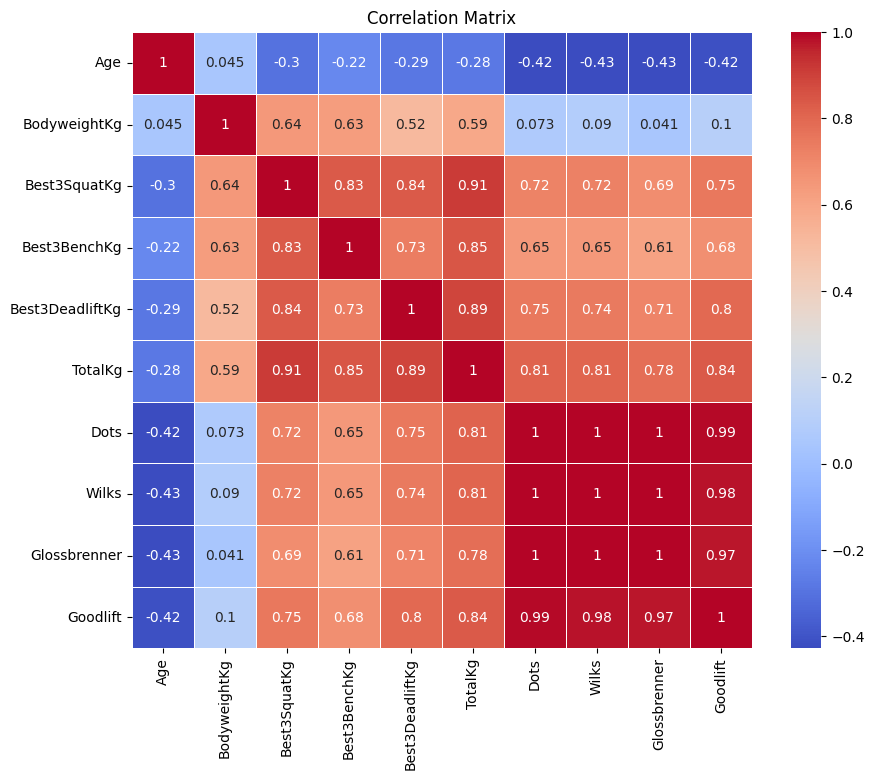

In [6]:
# Calculate and Visualize the Correlation Matrix
numeric_df = filtered_df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Wykresy dla wieku poniżej 18 i powyżej 30 oraz minimalnej i maksymalnej wagi

In [7]:
filtered_df['WeightClassKg'].value_counts()

WeightClassKg
93      953
83      927
74      843
105     832
120     641
66      598
120+    481
59      416
53       85
90       61
52       16
56        8
60        3
110+      2
82.5      1
110       1
67.5      1
Name: count, dtype: int64

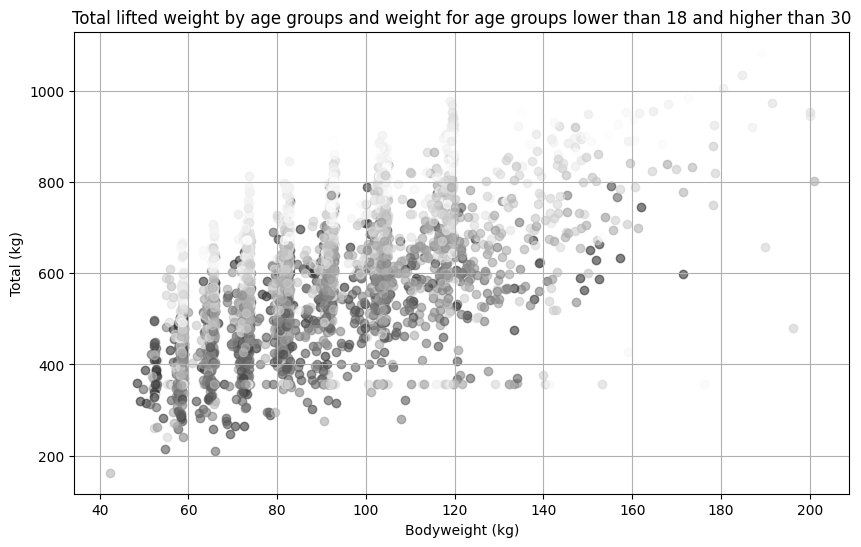

In [8]:
def age_to_color(age, min_age, max_age):
    normalized_age = (age - min_age) / (max_age - min_age)
    return str(1 - normalized_age * 0.8) 

plt.figure(figsize=(10, 6))

age_groups = {
    'under_18': filtered_df[filtered_df['Age'] < 18],
    'over_30': filtered_df[filtered_df['Age'] > 30]
}

for group_name, group_df in age_groups.items():
    min_age = group_df['Age'].min()
    max_age = group_df['Age'].max()
    for _, row in group_df.iterrows():
        plt.scatter(row['BodyweightKg'], row['TotalKg'], color=age_to_color(row['Age'], min_age, max_age), alpha=0.6)

plt.title("Total lifted weight by age groups and weight for age groups lower than 18 and higher than 30")
plt.xlabel("Bodyweight (kg)")
plt.ylabel("Total (kg)")
plt.grid()
plt.show()

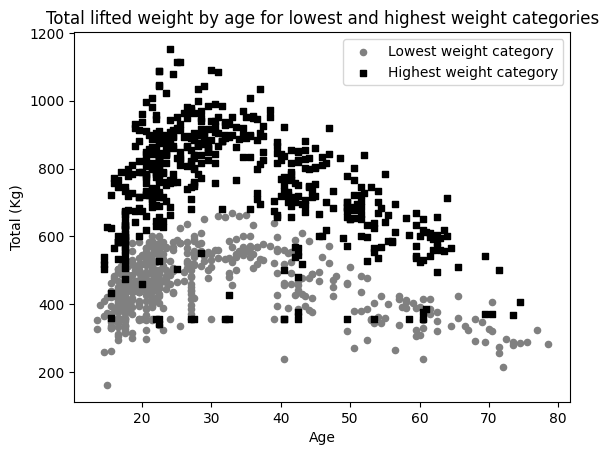

In [9]:
# Filter data for minimum weight
min_weight_df = filtered_df[filtered_df['BodyweightKg'] < 60]
if not min_weight_df.empty:
    plt.scatter(min_weight_df['Age'], min_weight_df['TotalKg'], color='gray', s=20, label='Lowest weight category', marker='o')

# Filter data for maximum weight
max_weight_df = filtered_df[filtered_df['BodyweightKg'] > 120]
if not max_weight_df.empty:
    plt.scatter(max_weight_df['Age'], max_weight_df['TotalKg'], color='black', s=20, label='Highest weight category', marker='s')

plt.title('Total lifted weight by age for lowest and highest weight categories')
plt.xlabel('Age')
plt.ylabel('Total (Kg)')
plt.legend()
plt.show()

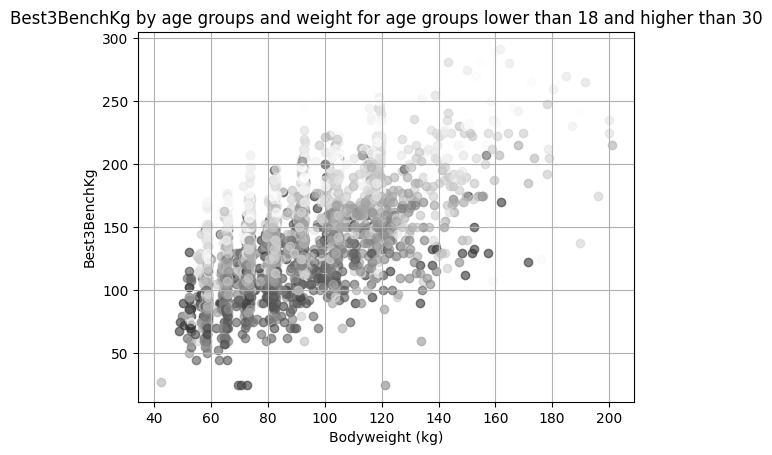

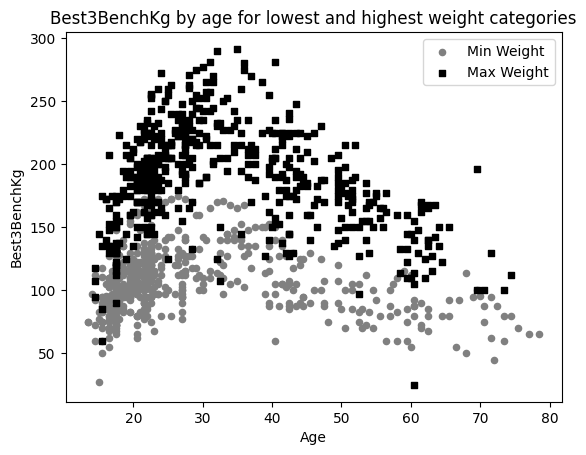

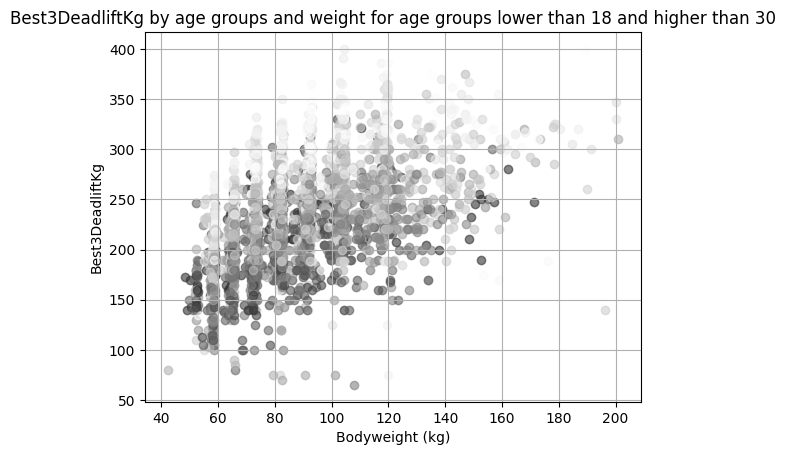

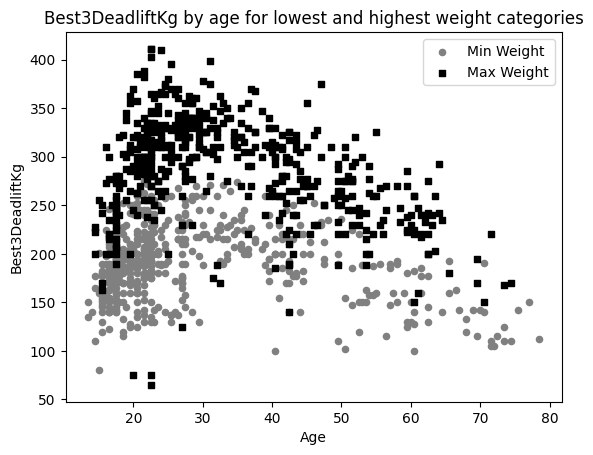

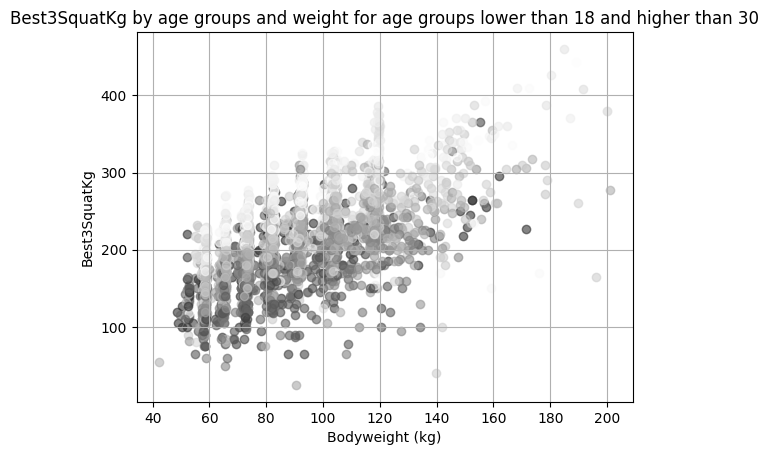

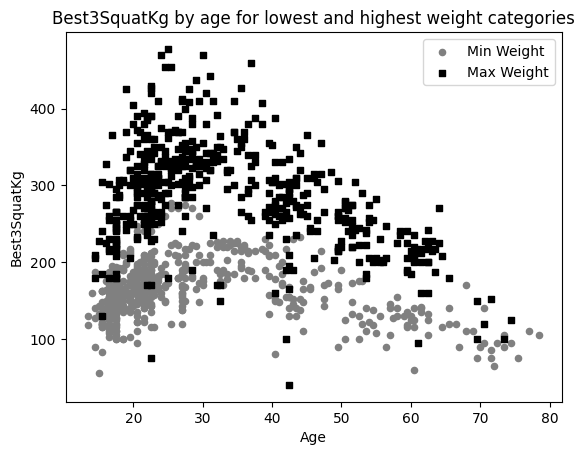

In [10]:
for lift in ['Best3BenchKg', 'Best3DeadliftKg', 'Best3SquatKg']:
    for group_name, group_df in age_groups.items():
        min_age = group_df['Age'].min()
        max_age = group_df['Age'].max()
        for _, row in group_df.iterrows():
            plt.scatter(row['BodyweightKg'], row[lift], color=age_to_color(row['Age'], min_age, max_age), alpha=0.6)

    plt.title(f"{lift} by age groups and weight for age groups lower than 18 and higher than 30")
    plt.xlabel("Bodyweight (kg)")
    plt.ylabel(lift)
    plt.grid()
    plt.show()

    if not min_weight_df.empty:
        plt.scatter(min_weight_df['Age'], min_weight_df[lift], color='gray', s=20, label='Min Weight', marker='o')

    if not max_weight_df.empty:
        plt.scatter(max_weight_df['Age'], max_weight_df[lift], color='black', s=20, label='Max Weight', marker='s')

    plt.title(f'{lift} by age for lowest and highest weight categories')
    plt.xlabel('Age')
    plt.ylabel(lift)
    plt.legend()
    plt.show()

## Anomalie

C:\Users\Patryk\AppData\Local\Temp\ipykernel_38828\871361703.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Outlier'] = outliers


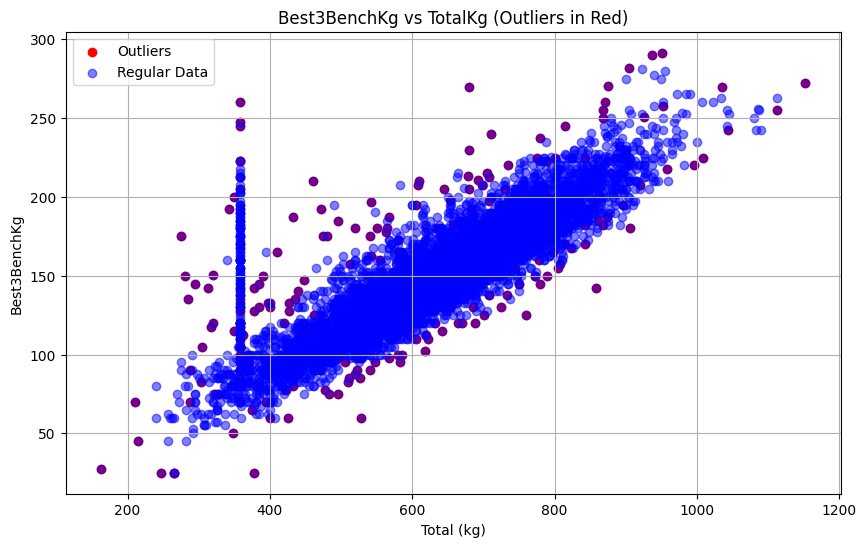

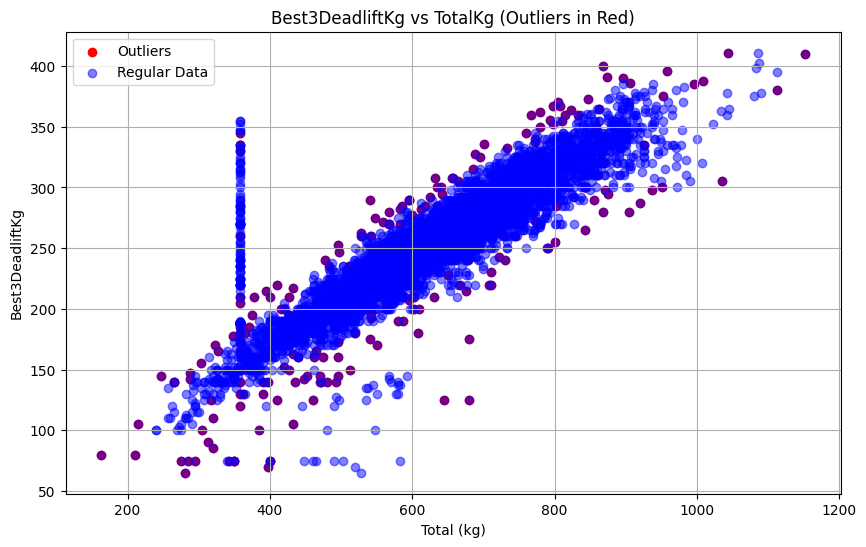

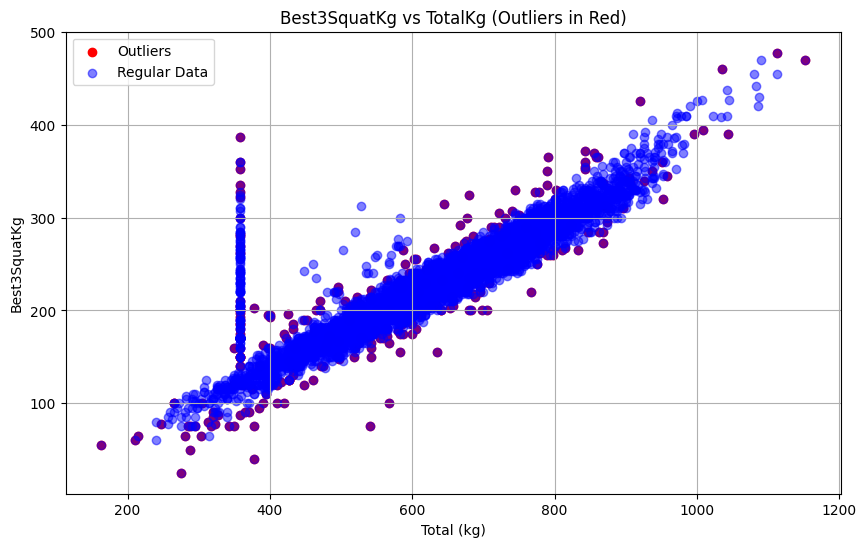

In [11]:
scaler = StandardScaler()
features = ['TotalKg', 'Best3BenchKg', 'Best3DeadliftKg', 'Best3SquatKg']
scaled_features = scaler.fit_transform(filtered_df[features])

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outliers = lof.fit_predict(scaled_features)

filtered_df['Outlier'] = outliers

outliers_df = filtered_df[filtered_df['Outlier'] == -1]

for lift in ['Best3BenchKg', 'Best3DeadliftKg', 'Best3SquatKg']:
    plt.figure(figsize=(10, 6))

    plt.scatter(outliers_df['TotalKg'], outliers_df[lift], color='red', label='Outliers')
    plt.scatter(filtered_df['TotalKg'], filtered_df[lift], color='blue', alpha=0.5, label='Regular Data')

    plt.title(f"{lift} vs TotalKg (Outliers in Red)")
    plt.xlabel("Total (kg)")
    plt.ylabel(lift)
    plt.legend()
    plt.grid()
    plt.show()

In [12]:
def find_outliers_knn(df, feature, n_neighbors=5):
    knn = NearestNeighbors(n_neighbors=n_neighbors)
    knn.fit(df[[feature]])
    distances, _ = knn.kneighbors(df[[feature]])
    
    avg_distances = distances.mean(axis=1)
    threshold = np.percentile(avg_distances, 95) 
    
    outliers = df[avg_distances > threshold]
    return outliers

features = ['Best3BenchKg', 'Best3DeadliftKg', 'Best3SquatKg']
outliers_dict = {}

for feature in features:
    outliers_dict[feature] = find_outliers_knn(filtered_df, feature)

outliers_indices = {feature: set(outliers.index) for feature, outliers in outliers_dict.items()}
common_outliers = set.intersection(*outliers_indices.values())

print("Unusual scores in more than one lift")
print(filtered_df.loc[list(common_outliers), ['Age', 'BodyweightKg'] + features])

Unusual scores in more than one lift
        Age  BodyweightKg  Best3BenchKg  Best3DeadliftKg  Best3SquatKg
28962  28.0        158.30        263.08           362.87        408.23
43140  15.0         42.25         27.50            80.00         55.00
68870  72.0         54.77         45.00           105.00         65.00
28936  28.5         82.50        179.17           317.52        263.08
48908  22.5        160.38        256.00           410.50        420.00
66158  24.0        178.20        272.50           410.00        470.00
34386  25.5        179.90        262.50           395.00        455.00
28915  37.0         56.00        117.93           226.80        188.24
28916  16.0         54.88         95.25           224.53        163.29
28919  31.0         60.00        115.67           240.40        201.85
28920  28.0         60.00        140.61           181.44        197.31
28958  27.0        110.00        247.21           317.52        340.19


## Klasyfikacja względem ustalonych kategorii wagowych

In [ ]:
X = filtered_df[['BodyweightKg', 'Best3BenchKg', 'Best3DeadliftKg', 'Best3SquatKg']]
y = filtered_df['WeightClassKg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

cross_val_scores = cross_val_score(clf, X, y, cv=5)
print(f"Cross-validation accuracy: {np.mean(cross_val_scores):.4f}")

Accuracy: 0.9847
Classification Report:
              precision    recall  f1-score   support

         105       0.98      1.00      0.99       166
        110+       0.00      0.00      0.00         1
         120       0.99      1.00      1.00       131
        120+       1.00      1.00      1.00        93
          52       0.80      1.00      0.89         4
          53       1.00      0.95      0.97        19
          56       0.00      0.00      0.00         2
          59       0.96      1.00      0.98        81
          66       1.00      1.00      1.00       123
          74       0.99      1.00      1.00       158
        82.5       0.00      0.00      0.00         1
          83       0.98      1.00      0.99       196
          90       0.00      0.00      0.00        13
          93       0.98      1.00      0.99       186

    accuracy                           0.98      1174
   macro avg       0.69      0.71      0.70      1174
weighted avg       0.97      0.98      0

c:\Users\Patryk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Patryk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Patryk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Cross-validation accuracy: 0.9855


## Klasteryzacja na podstawie wyników

c:\Users\Patryk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Patryk\AppData\Local\Temp\ipykernel_38828\2500849176.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cluster'] = kmeans.fit_predict(scaled_features)


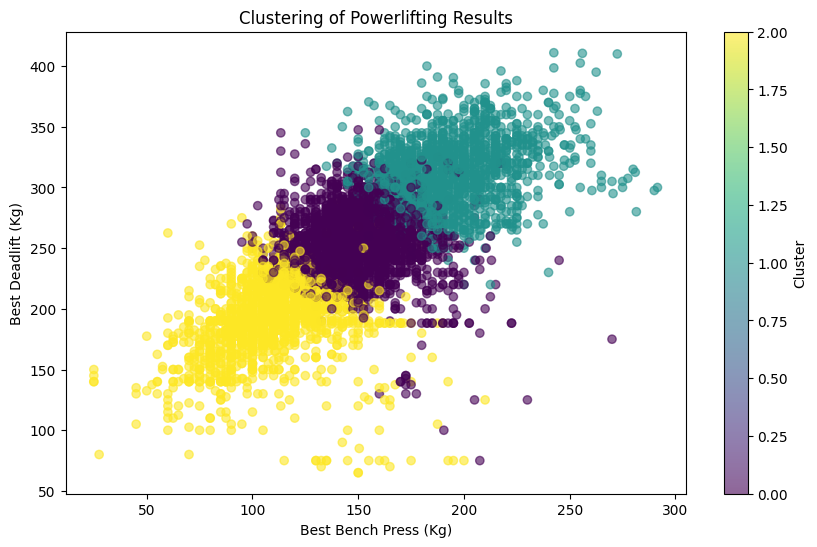

In [23]:
clustering_features = filtered_df[['TotalKg', 'Best3BenchKg', 'Best3DeadliftKg', 'Best3SquatKg']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

kmeans = KMeans(n_clusters=3, random_state=42)
filtered_df['Cluster'] = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Best3BenchKg'], filtered_df['Best3DeadliftKg'], c=filtered_df['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Clustering of Powerlifting Results')
plt.xlabel('Best Bench Press (Kg)')
plt.ylabel('Best Deadlift (Kg)')
plt.colorbar(label='Cluster')
plt.show()

c:\Users\Patryk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Patryk\AppData\Local\Temp\ipykernel_38828\2089183309.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cluster'] = kmeans.fit_predict(scaled_features)


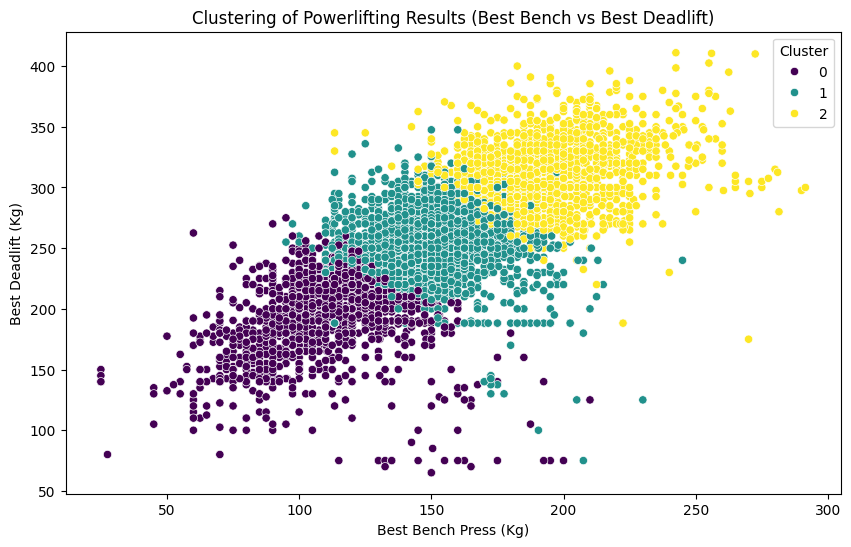

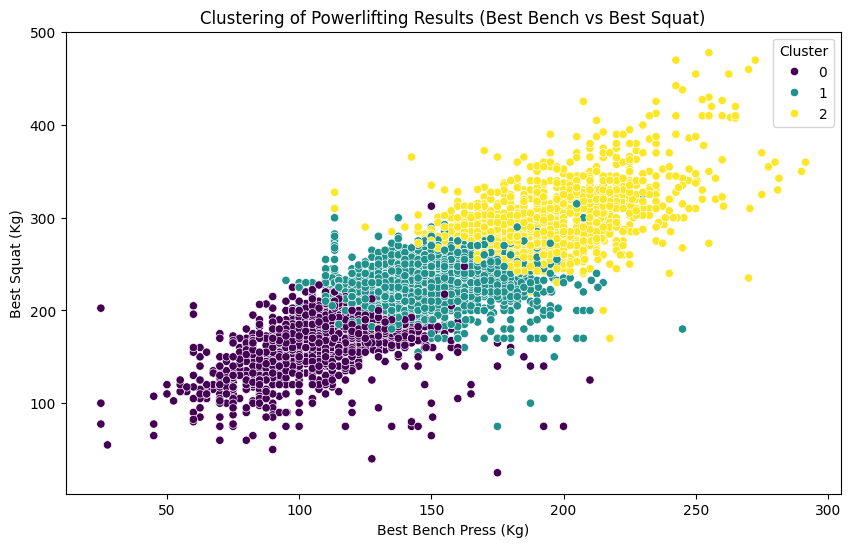

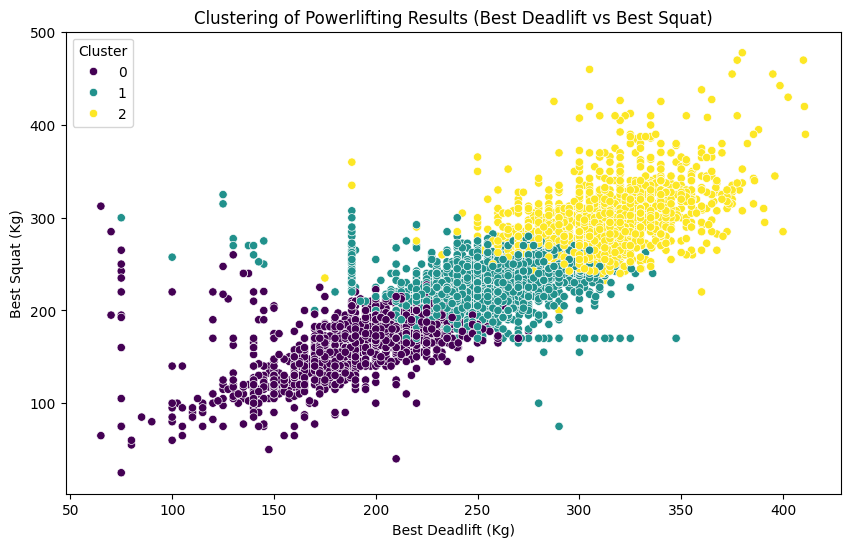

In [20]:
scaler = StandardScaler()
features = ['Best3BenchKg', 'Best3DeadliftKg', 'Best3SquatKg']
scaled_features = scaler.fit_transform(filtered_df[features])

kmeans = KMeans(n_clusters=3, random_state=42)
filtered_df['Cluster'] = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='Best3BenchKg', y='Best3DeadliftKg', hue='Cluster', palette='viridis')
plt.title('Clustering of Powerlifting Results (Best Bench vs Best Deadlift)')
plt.xlabel('Best Bench Press (Kg)')
plt.ylabel('Best Deadlift (Kg)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='Best3BenchKg', y='Best3SquatKg', hue='Cluster', palette='viridis')
plt.title('Clustering of Powerlifting Results (Best Bench vs Best Squat)')
plt.xlabel('Best Bench Press (Kg)')
plt.ylabel('Best Squat (Kg)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='Best3DeadliftKg', y='Best3SquatKg', hue='Cluster', palette='viridis')
plt.title('Clustering of Powerlifting Results (Best Deadlift vs Best Squat)')
plt.xlabel('Best Deadlift (Kg)')
plt.ylabel('Best Squat (Kg)')
plt.show()